#Monte Carlo Simulation

#### v1.0.0

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

li = []                                                           # empty list "li" takes number of days passed
pbi_count = int(input("input item count: "))                      # the variable "x" takes the item count input, which basically
intended_runs = int(input("input number of intended MCS runs: ")) # select number of simulation runs
tp = int(input("input work item Throughput (TP): "))              # select the teams work item throughput

def mcs():
  item_count = pbi_count
  loop_count = 0
  while item_count > 0:
    integer = np.random.randint(0, tp + 1)
    item_count -= integer
    loop_count += 1
  li.append(loop_count)
  return loop_count


for i in range(intended_runs):
  mcs()

print(li)

input item count: 40
input number of intended MCS runs: 100000
input work item Throughput (TP): 2
[46, 49, 39, 47, 36, 35, 45, 42, 41, 36, 40, 49, 48, 42, 55, 37, 38, 28, 43, 55, 38, 44, 46, 44, 39, 51, 42, 38, 41, 50, 38, 30, 41, 33, 43, 45, 47, 42, 35, 39, 47, 38, 34, 39, 46, 37, 42, 33, 38, 33, 34, 50, 33, 51, 43, 47, 32, 40, 44, 37, 46, 31, 43, 38, 36, 38, 38, 36, 42, 42, 42, 40, 44, 37, 39, 33, 47, 42, 39, 43, 41, 40, 49, 31, 44, 31, 43, 36, 43, 35, 34, 39, 35, 48, 44, 35, 38, 41, 41, 34, 50, 41, 45, 40, 45, 36, 34, 40, 41, 33, 40, 45, 45, 36, 49, 47, 43, 36, 41, 42, 47, 35, 42, 37, 33, 39, 38, 32, 40, 43, 34, 35, 37, 56, 44, 37, 41, 41, 44, 35, 38, 36, 38, 43, 34, 35, 36, 32, 38, 41, 39, 39, 48, 46, 27, 35, 47, 32, 46, 34, 40, 47, 37, 44, 39, 36, 44, 42, 36, 43, 45, 38, 38, 39, 34, 41, 44, 40, 44, 31, 45, 45, 43, 43, 48, 38, 41, 45, 33, 39, 46, 39, 33, 39, 37, 42, 37, 39, 41, 36, 47, 47, 38, 38, 43, 43, 39, 45, 40, 43, 39, 47, 46, 43, 39, 41, 39, 41, 34, 43, 53, 45, 42, 32, 46, 4

In [ ]:
mcs_series = pd.Series(li, name="Monte Carlo Simulation")

In [ ]:
mcs_series.info(), mcs_series.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monte Carlo Simulation
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


(None,
 count    100000.000000
 mean         40.356110
 std           5.205375
 min          23.000000
 25%          37.000000
 50%          40.000000
 75%          44.000000
 max          70.000000
 Name: Monte Carlo Simulation, dtype: float64)

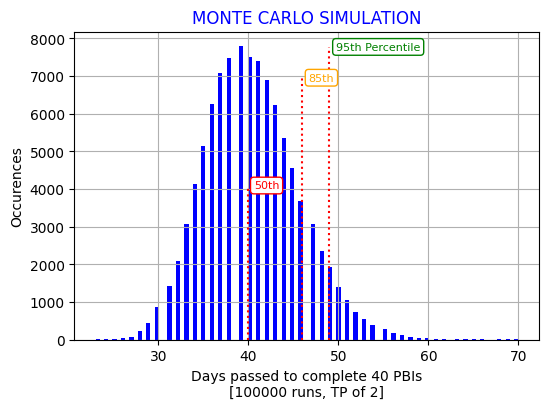

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
mcs_series.plot(kind="hist", color="blue", alpha=1, bins=100)
#mcs_series.plot(kind="kde")

y_lim = ax.get_ylim()
y = y_lim[1]
y_lim, y

quant_50, quant_85, quant_95 = mcs_series.quantile(0.5), mcs_series.quantile(0.85), mcs_series.quantile(0.95)
quant_50, quant_85, quant_95

x_50 = quant_50 + (quant_50 * 0.015)
x_85 = quant_85 + (quant_85 * 0.015)
x_95 = quant_95 + (quant_95 * 0.015)
y_50 = y - (y * 0.5)
y_85 = y - (y * 0.15)
y_95 = y - (y * 0.05)

quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
for i in quants:
  plt.axvline(i[0], alpha=i[1], ymax=i[2], linestyle=":", color="red")

ax.text(x_50, y_50, "50th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="red",
        bbox=dict(facecolor="white", edgecolor="red", boxstyle="round"))
ax.text(x_85, y_85, "85th", horizontalalignment="left", verticalalignment="center", size=8, alpha=1, color="orange",
        bbox=dict(facecolor="white", edgecolor="orange", boxstyle='round'))
ax.text(x_95, y_95, "95th Percentile",  horizontalalignment="left", verticalalignment="center",size=8, alpha=1, color="green",
        bbox=dict(facecolor="white", edgecolor="green", boxstyle="round"))


ax.set(title="MONTE CARLO SIMULATION", xlabel=f"Days passed to complete {pbi_count} PBIs\n[{intended_runs} runs, TP of {tp}]", ylabel="Occurences")
ax.title.set_color("blue")
ax.xaxis.label.set_color("black")
ax.yaxis.label.set_color("black")
plt.grid(True)
plt.show()

In [ ]:
ax.get_ylim()

(0.0, 6861.75)

Text(0, 0.5, 'Occurences')

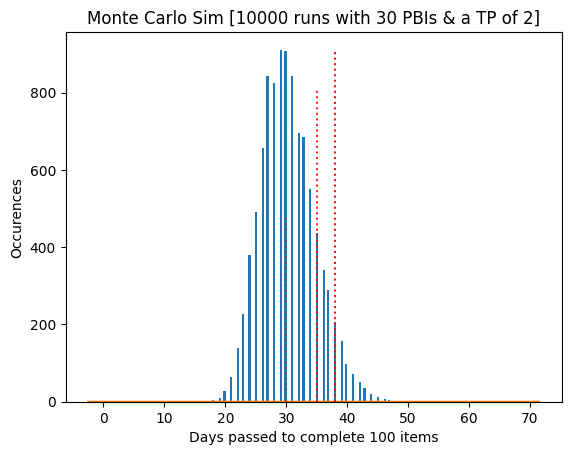

In [ ]:
mcs_series.plot(kind="hist", alpha=1, bins=100)
#mcs_series.plot(kind="kde")
quants = [[quant_50, 1, 0.5], [quant_85, 1, 0.85], [quant_95, 1, 0.95]]
for i in quants:
  #plt.axhline(y=10000, linestyle=":", color="r")
  plt.axvline(i[0], alpha=i[2], ymax=i[2], linestyle=":", color="r")

#plt.axhline(y=26000, xmax=0.48, linestyle=":", color="r")
plt.title(f"Monte Carlo Sim [{intended_runs} runs with {pbi_count} PBIs & a TP of {tp}]")
plt.xlabel("Days passed to complete 100 items")
plt.ylabel("Occurences")
#plt.title(f"MONTE CARLO SIMULATION", color="blue")
#plt.xlabel(f"Days passed to complete {pbi_count} PBIs\n[{intended_runs} runs, TP of {tp}]", color="blue")
#plt.ylabel("Occurences", color="blue")
#plt.show()